## USGS data description

- time: час землетрусу у форматі UTC
- latitude: широта епіцентру землетрусу
- longitude: довгота епіцентру землетрусу
- depth: глибина землетрусу у кілометрах
- mag: магнітуда землетрусу
- magType: тип магнітуди, наприклад, "mb" для магнітуди Мб, "ml" для магнітуди Мл і т.д.
- nst: кількість визначень, що використовувалися для розрахунку магнітуди
- gap: кутовий проміжок між найбільш і найменш точним визначеннями магнітуди
- dmin: найменша відстань між епіцентром землетрусу та найближчим станом (у градусах)
- rms: корінь середньоквадратичної помилки для геологічних даних, використовуваних для розрахунку магнітуди
- net: ідентифікатор мережі, що зібрала дані
- id: ідентифікатор землетрусу
- updated: час оновлення інформації про землетрус у форматі UTC
- place: місце, де відбувся землетрус
- type: тип землетрусу
- horizontalError: горизонтальна помилка (у кілометрах)
- depthError: помилка глибини (у кілометрах)
- magError: помилка магнітуди
- magNst: кількість визначень, використовуваних для розрахунку mag
- status: статус землетрусу

In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import date
import datetime
from geopy.geocoders import Nominatim
import geocoder
from googletrans import Translator
from google.cloud import storage
import os
import io
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
today = date.today()
year = today.year
print("Today's date:", today, "Today's year:", year)

Today's date: 2023-05-12 Today's year: 2023


In [5]:
path = f'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime={year}-01-01%2000:00:00&endtime={today}%2023:59:59&minmagnitude=2.5&orderby=time'
data = pd.read_csv(path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             6791 non-null   object 
 1   latitude         6791 non-null   float64
 2   longitude        6791 non-null   float64
 3   depth            6791 non-null   float64
 4   mag              6791 non-null   float64
 5   magType          6791 non-null   object 
 6   nst              6290 non-null   float64
 7   gap              6289 non-null   float64
 8   dmin             6114 non-null   float64
 9   rms              6790 non-null   float64
 10  net              6791 non-null   object 
 11  id               6791 non-null   object 
 12  updated          6791 non-null   object 
 13  place            6314 non-null   object 
 14  type             6791 non-null   object 
 15  horizontalError  6253 non-null   float64
 16  depthError       6790 non-null   float64
 17  magError      

In [5]:
data.head(5)


time   latitude  longitude       depth  mag magType  \
0  2023-04-06T14:20:29.124Z  63.047500 -150.44320  100.200000  3.6      ml   
1  2023-04-06T13:28:34.798Z  -5.736200  104.07220   84.646000  4.6      mb   
2  2023-04-06T10:29:38.466Z  32.844543 -100.54366    0.953735  2.9      ml   
3  2023-04-06T10:03:37.036Z  12.256700  -88.00430   42.753000  4.6      mb   
4  2023-04-06T09:33:02.409Z  39.067600  -97.58780    5.000000  3.2   mb_lg   

    nst    gap      dmin   rms  ...                   updated  \
0   NaN    NaN       NaN  0.78  ...  2023-04-06T14:40:46.948Z   
1  31.0  183.0  1.762000  0.83  ...  2023-04-06T13:49:07.040Z   
2  30.0   89.0  0.054159  0.20  ...  2023-04-06T11:09:23.040Z   
3  58.0  129.0  1.055000  1.14  ...  2023-04-06T10:22:47.040Z   
4  31.0   66.0  0.762000  0.66  ...  2023-04-06T15:11:42.320Z   

                              place        type horizontalError depthError  \
0                    Central Alaska  earthquake             NaN    0.30000   
1  134 km SW of Kotabumi, Indonesia  earthquake        11.52000    9.61800   
2            7 km W of Rotan, Texas  earthquake         0.88901    1.06477   
3                               NaN  earthquake         8.01000    9.65400   
4      4 km N of Bennington, Kansas  earthquake         2.10000    1.98100   

   magError  magNst    status  locationSource magSource  
0       NaN     NaN  reviewed              ak        ak  
1     0.105    27.0  reviewed              us        us  
2     0.100    15.0  reviewed              tx        tx  
3     0.048   127.0  reviewed              us        us  
4     0.043   141.0  reviewed              us        us  

[5 rows x 22 columns]

In [6]:
data

time   latitude   longitude   depth   mag magType  \
0     2023-04-24T13:21:23.990Z  17.945167  -66.905667  11.310  2.88      md   
1     2023-04-24T13:09:10.422Z  54.751500 -157.794100   2.600  4.90      ml   
2     2023-04-24T13:03:16.560Z  17.946500  -66.905833   8.240  2.93      md   
3     2023-04-24T11:41:38.370Z  17.961500  -66.954500   6.700  3.07      md   
4     2023-04-24T11:35:43.876Z  -4.962000  102.899900  62.433  4.80      mb   
...                        ...        ...         ...     ...   ...     ...   
8007  2023-01-01T03:29:31.070Z  19.163100  -66.525100  24.000  3.93      md   
8008  2023-01-01T03:16:14.442Z  -6.706500  155.232000  35.000  5.40     mww   
8009  2023-01-01T02:12:57.668Z  44.369500 -115.200800  10.000  2.50      ml   
8010  2023-01-01T01:41:43.755Z   7.139700  126.738000  79.194  4.50      mb   
8011  2023-01-01T00:49:25.294Z  52.099900  178.521800  82.770  3.10      ml   

        nst    gap     dmin   rms  ...                   updated  \
0       8.0  221.0  0.03893  0.23  ...  2023-04-24T13:30:19.860Z   
1       NaN    NaN      NaN  0.57  ...  2023-04-24T13:15:46.935Z   
2      11.0  221.0  0.03803  0.35  ...  2023-04-24T13:14:40.590Z   
3      12.0  208.0  0.07288  0.20  ...  2023-04-24T12:07:01.224Z   
4      52.0   92.0  0.60000  0.93  ...  2023-04-24T11:57:41.040Z   
...     ...    ...      ...   ...  ...                       ...   
8007   23.0  246.0  0.84790  0.22  ...  2023-03-11T22:51:29.040Z   
8008  130.0   36.0  3.94600  0.68  ...  2023-03-11T22:51:29.040Z   
8009   16.0   82.0  0.77400  0.71  ...  2023-03-11T22:51:29.040Z   
8010   32.0  104.0  1.15200  0.47  ...  2023-03-11T22:51:45.040Z   
8011   14.0  139.0  0.87000  0.18  ...  2023-03-11T22:51:52.040Z   

                                       place        type horizontalError  \
0             2 km S of Guánica, Puerto Rico  earthquake            1.08   
1           154 km SSE of Perryville, Alaska  earthquake             NaN   
2             2 km S of Guánica, Puerto Rico  earthquake            1.26   
3                         Puerto Rico region  earthquake            0.68   
4        110 km SSW of Pagar Alam, Indonesia  earthquake            4.82   
...                                      ...         ...             ...   
8007                      Puerto Rico region  earthquake            0.91   
8008  51 km SSW of Panguna, Papua New Guinea  earthquake            8.95   
8009              26 km NW of Stanley, Idaho  earthquake            2.26   
8010         23 km ESE of Manay, Philippines  earthquake            5.51   
8011   Rat Islands, Aleutian Islands, Alaska  earthquake            8.46   

     depthError  magError  magNst     status  locationSource magSource  
0         0.650  0.250932     5.0   reviewed              pr        pr  
1         0.800       NaN     NaN  automatic              ak        ak  
2         0.960  0.105427     6.0   reviewed              pr        pr  
3         0.330  0.164628     6.0   reviewed              pr        pr  
4         7.067  0.084000    44.0   reviewed              us        us  
...         ...       ...     ...        ...             ...       ...  
8007     15.950  0.090000    16.0   reviewed              pr        pr  
8008      1.770  0.098000    10.0   reviewed              us        us  
8009      1.873  0.048000    58.0   reviewed              us        us  
8010      7.445  0.083000    43.0   reviewed              us        us  
8011     21.213  0.097000    14.0   reviewed              us        us  

[8012 rows x 22 columns]

In [7]:
# url1 = f"https://www.ngdc.noaa.gov/hazel/hazard-service/api/v1/earthquakes/"
# url = "https://www.ngdc.noaa.gov/hazel/hazard-service/api/v1/earthquakes?maxYear=2024&minYear=2000"
# response = requests.get(url)
    
# if response.status_code == 200:
#     data_noaa = response.json()
#     print(data_noaa)
# else:
#     print("Error: ", response.status_code)

In [12]:
round(data['mag']).value_counts()

4.0    2930
3.0    2147
5.0    1279
2.0     316
6.0     106
7.0      10
8.0       3
Name: mag, dtype: int64

In [14]:
dataPlaceNotNaN = data.dropna(subset=['place'])
data.reset_index(drop=True) #new index


In [15]:
dataPlaceNotNaN.head(3)

time   latitude  longitude       depth  mag magType  \
0  2023-04-06T14:20:29.124Z  63.047500 -150.44320  100.200000  3.6      ml   
1  2023-04-06T13:28:34.798Z  -5.736200  104.07220   84.646000  4.6      mb   
2  2023-04-06T10:29:38.466Z  32.844543 -100.54366    0.953735  2.9      ml   

    nst    gap      dmin   rms  ...                   updated  \
0   NaN    NaN       NaN  0.78  ...  2023-04-06T14:40:46.948Z   
1  31.0  183.0  1.762000  0.83  ...  2023-04-06T13:49:07.040Z   
2  30.0   89.0  0.054159  0.20  ...  2023-04-06T11:09:23.040Z   

                              place        type horizontalError depthError  \
0                    Central Alaska  earthquake             NaN    0.30000   
1  134 km SW of Kotabumi, Indonesia  earthquake        11.52000    9.61800   
2            7 km W of Rotan, Texas  earthquake         0.88901    1.06477   

   magError  magNst    status  locationSource magSource  
0       NaN     NaN  reviewed              ak        ak  
1     0.105    27.0  reviewed              us        us  
2     0.100    15.0  reviewed              tx        tx  

[3 rows x 22 columns]

In [16]:
dataPlaceNotNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6314 entries, 0 to 6790
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             6314 non-null   object 
 1   latitude         6314 non-null   float64
 2   longitude        6314 non-null   float64
 3   depth            6314 non-null   float64
 4   mag              6314 non-null   float64
 5   magType          6314 non-null   object 
 6   nst              5827 non-null   float64
 7   gap              5826 non-null   float64
 8   dmin             5659 non-null   float64
 9   rms              6313 non-null   float64
 10  net              6314 non-null   object 
 11  id               6314 non-null   object 
 12  updated          6314 non-null   object 
 13  place            6314 non-null   object 
 14  type             6314 non-null   object 
 15  horizontalError  5791 non-null   float64
 16  depthError       6313 non-null   float64
 17  magError      

In [1]:
countries = []
for i in range(len(dataPlaceNotNaN)):
    geolocator = Nominatim(user_agent="geoapiExercises")
    latitude_get = str(dataPlaceNotNaN.iloc[i]['latitude'])
    longitude_get = str(dataPlaceNotNaN.iloc[i]['longitude'])
    location = geolocator.reverse(latitude_get+","+longitude_get)
    if(location != None):
        print(location)
        address = location.raw['address']
        country = address.get('country', '')
        countries.append(country)
    else:
        location = 'NaN'
        print(location)
        countries.append(location)
    
print(countries)
    
# помилка

NameError: name 'dataPlaceNotNaN' is not defined

In [61]:
dataPlaceNotNaN.insert(loc= len(dataPlaceNotNaN.columns), column='Country', value=countries)

In [65]:
dataPlaceNotNaN.to_csv('C:\Users\Mark\Desktop\diplomna\dataset_earthquakes')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2074014460.py, line 1)

In [13]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/Mark/Downloads/fiery-script-386716-1bae2f2db448.json"

In [16]:
storage_client = storage.Client()
bucket_name = "earthquakes-data"
file_path = "C:/Users/Mark/Desktop/diplomna/dataset_earthquakess"
destination_blob_name = "earthquakes-data_V1.csv"

bucket = storage_client.get_bucket(bucket_name)
blob = bucket.blob(destination_blob_name)
blob.upload_from_filename(file_path)



# DATA ANALISE --------------------------------------------------------------

In [65]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/Mark/Downloads/fiery-script-386716-1bae2f2db448.json"

In [66]:
storage_client = storage.Client()
bucket_name = "earthquakes-data"
file_name = "dataset_earthquakess"
bucket = storage_client.get_bucket(bucket_name)
blob = bucket.blob(file_name)
content = blob.download_as_text()

dataset = pd.read_csv(io.StringIO(content))
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6314 entries, 0 to 6313
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6314 non-null   int64  
 1   time             6314 non-null   object 
 2   latitude         6314 non-null   float64
 3   longitude        6314 non-null   float64
 4   depth            6314 non-null   float64
 5   mag              6314 non-null   float64
 6   magType          6314 non-null   object 
 7   nst              5827 non-null   float64
 8   gap              5826 non-null   float64
 9   dmin             5659 non-null   float64
 10  rms              6313 non-null   float64
 11  net              6314 non-null   object 
 12  id               6314 non-null   object 
 13  updated          6314 non-null   object 
 14  place            6314 non-null   object 
 15  type             6314 non-null   object 
 16  horizontalError  5791 non-null   float64
 17  depthError    

In [67]:
#dataset = pd.read_csv('C:/Users/Mark/Desktop/diplomna/dataset_earthquakess')
#dataset.info()


In [68]:
def format_date(date_string):
    date_time = pd.to_datetime(date_string)
    formatted_date = date_time.strftime("%m/%d/%Y %H:%M:%S")
    return formatted_date

dataset['time'] = dataset['time'].apply(format_date)

In [69]:
dataset.head()

Unnamed: 0                 time   latitude  longitude       depth   mag  \
0           0  04/06/2023 14:20:29  63.047500 -150.44320  100.200000  3.60   
1           1  04/06/2023 13:28:34  -5.736200  104.07220   84.646000  4.60   
2           2  04/06/2023 10:29:38  32.844543 -100.54366    0.953735  2.90   
3           4  04/06/2023 09:33:02  39.067600  -97.58780    5.000000  3.20   
4           5  04/06/2023 09:16:56  35.791500  -96.97850    7.230000  3.24   

  magType   nst    gap      dmin  ...                             place  \
0      ml   NaN    NaN       NaN  ...                    Central Alaska   
1      mb  31.0  183.0  1.762000  ...  134 km SW of Kotabumi, Indonesia   
2      ml  30.0   89.0  0.054159  ...            7 km W of Rotan, Texas   
3   mb_lg  31.0   66.0  0.762000  ...      4 km N of Bennington, Kansas   
4      ml  81.0   31.0  0.000000  ...                          Oklahoma   

         type horizontalError depthError magError magNst    status  \
0  earthquake             NaN    0.30000      NaN    NaN  reviewed   
1  earthquake        11.52000    9.61800    0.105   27.0  reviewed   
2  earthquake         0.88901    1.06477    0.100   15.0  reviewed   
3  earthquake         2.10000    1.98100    0.043  141.0  reviewed   
4  earthquake             NaN    0.30000    0.200   37.0  reviewed   

   locationSource  magSource        Country  
0              ak         ak  United States  
1              us         us      Indonesia  
2              tx         tx  United States  
3              us         us  United States  
4              ok         ok  United States  

[5 rows x 24 columns]

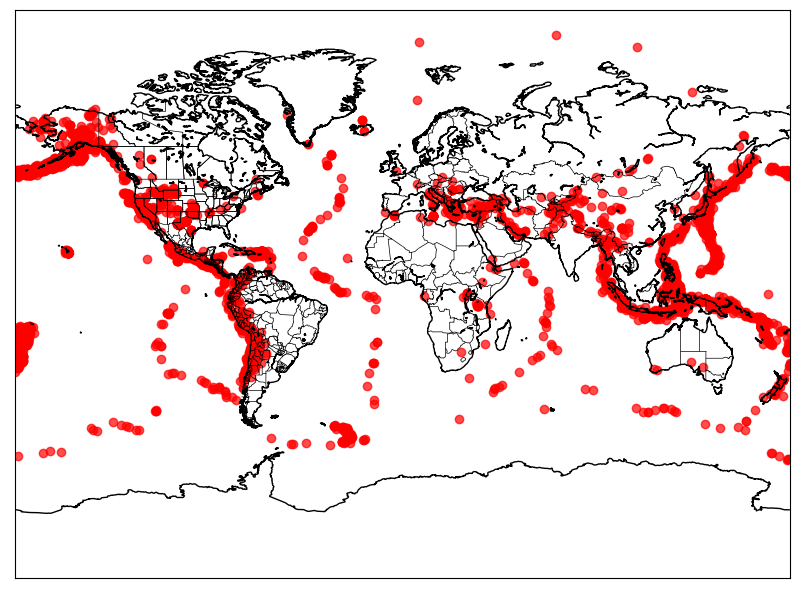

In [70]:
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='l')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

lons = dataset['longitude']
lats = dataset['latitude']
x, y = m(lons, lats)

m.scatter(x, y, marker='o', color='red', alpha=0.7)

plt.show()


In [71]:
fig = px.scatter_mapbox(dataset,
                       lon = dataset['longitude'],
                       lat = dataset['latitude'],
                       zoom = 2,
                       color = dataset['mag'],
                       size = dataset['mag'],
                       width = 950,
                       height = 600,
                       color_continuous_scale=['#90EE90', '#bf2304'],
                       title = '')

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0, "t":50, "l":0, "b":10})
fig.show()

In [72]:
new_time = pd.to_datetime(dataset['time'])

new_time = new_time.dt.date

fig = px.scatter_mapbox(dataset,
                       lon = dataset['longitude'],
                       lat = dataset['latitude'],
                       zoom = 1,
                       color = dataset['mag'],
                       size = dataset['mag'],
                       width = 950,
                       height = 750,
                       color_continuous_scale=['#90EE90', '#bf2304'],
                       mapbox_style='stamen-terrain',
                       animation_frame = new_time,
                       title = 'some title')

fig.update_layout(margin = {"r":0, "t":50, "l":0, "b":10})
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

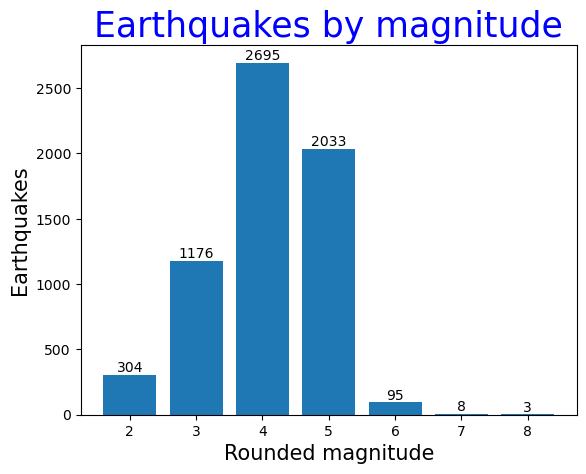

In [73]:

font_title = {'family':'Sans','color':'blue','size':25}
font_label = {'family':'Sans','color':'black','size':15}

x = pd.unique(round(dataset['mag']))
y = round(dataset['mag']).value_counts()

ax=plt.bar(x, y)

plt.title("Earthquakes by magnitude", fontdict = font_title)
plt.xlabel("Rounded magnitude", fontdict=font_label)
plt.ylabel("Earthquakes", fontdict=font_label)
plt.bar_label(ax, labels=y)

plt.show

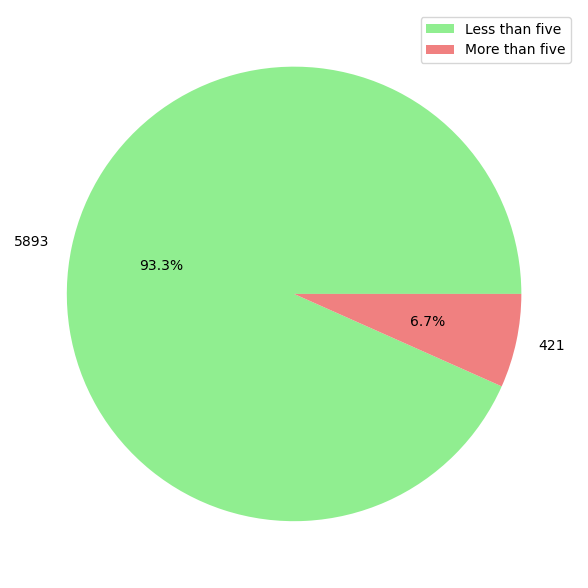

In [74]:
labels = ['Less than five', 'More than five']
colors = ['lightgreen', 'lightcoral']
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(dataset.value_counts(dataset['mag']>=5), labels = dataset.value_counts(dataset['mag'] >= 5), autopct='%.1f%%', colors = colors)
ax.legend(labels)
plt.tight_layout()

In [75]:
mag_more5 = dataset.loc[dataset['mag'] >= 5]
mag_less5 = dataset.loc[dataset['mag'] < 5]


In [79]:
fig = px.scatter_mapbox(dataset,
                       lon = mag_less5['longitude'],
                       lat = mag_less5['latitude'],
                       zoom = 2,
                       color = mag_less5['mag'],
                       size = mag_less5['mag'],
                       width = 950,
                       height = 600,
                       color_continuous_scale=['#90EE90', '#eb922d'],
                       title = 'Magnitude less 5')

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0, "t":50, "l":0, "b":10})
fig.show()

fig = px.scatter_mapbox(dataset,
                       lon = mag_more5['longitude'],
                       lat = mag_more5['latitude'],
                       zoom = 2,
                       color = mag_more5['mag'],
                       size = mag_more5['mag'],
                       width = 950,
                       height = 600,
                       color_continuous_scale=['#eb922d', '#bf2304'],
                       title = 'Magnitude more 5')

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0, "t":50, "l":0, "b":10})
fig.show()

Text(0.5, 1.0, 'Dependence of Depth on Magnitude')

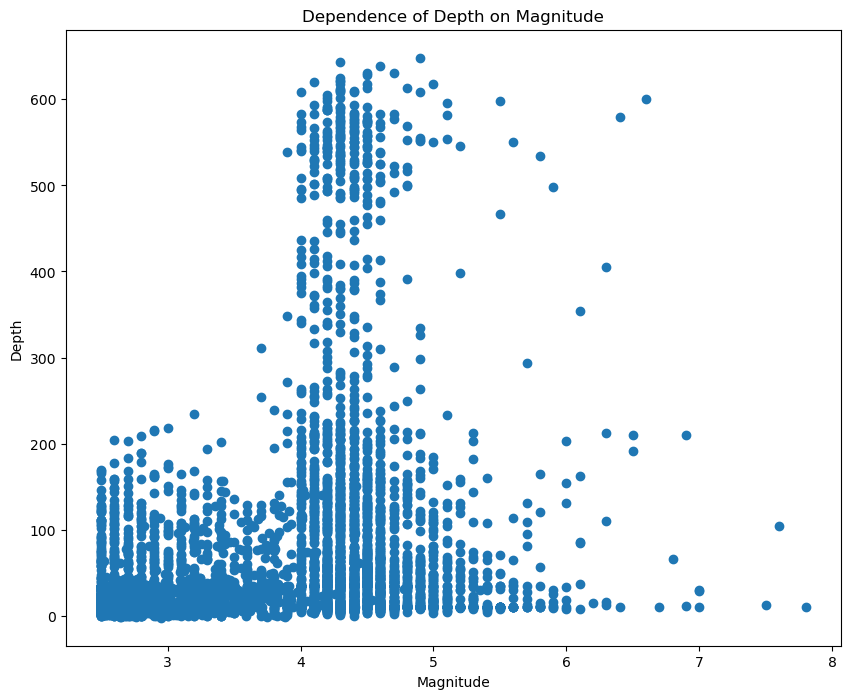

In [80]:
plt.figure(figsize=(10, 8))
plt.scatter(dataset['mag'], dataset['depth'])
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.title('Dependence of Depth on Magnitude')

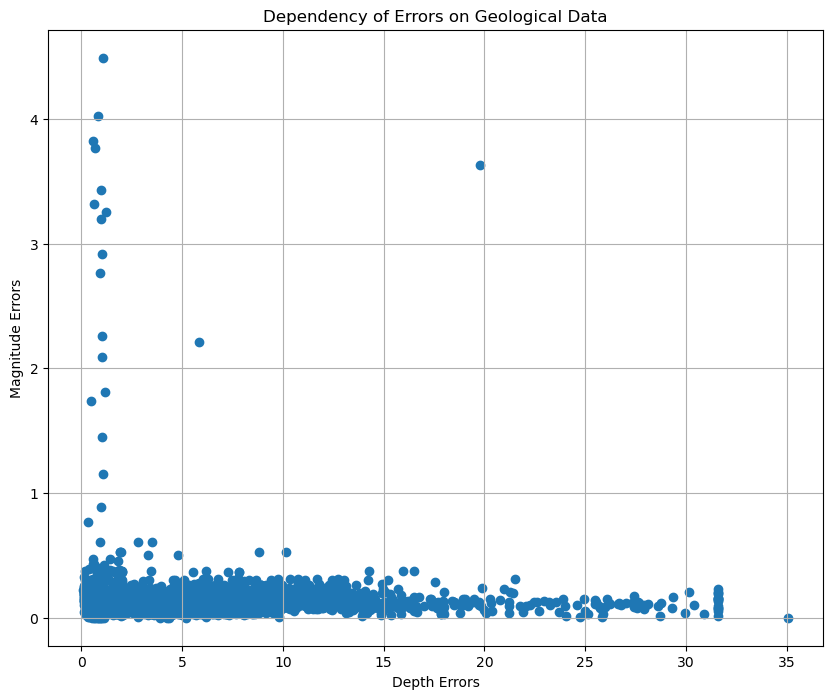

In [81]:
plt.figure(figsize=(10, 8))
plt.scatter(dataset['depthError'], dataset['magError'])
plt.xlabel('Depth Errors')
plt.ylabel('Magnitude Errors')
plt.title('Dependency of Errors on Geological Data')
plt.grid(True)
plt.show()


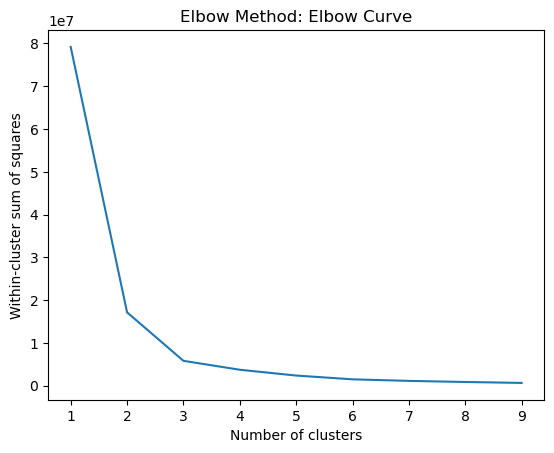

In [82]:
data = np.column_stack((dataset['mag'], dataset['depth']))  
inertia = []

for k in range(1, 10):  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method: Elbow Curve')
plt.show()

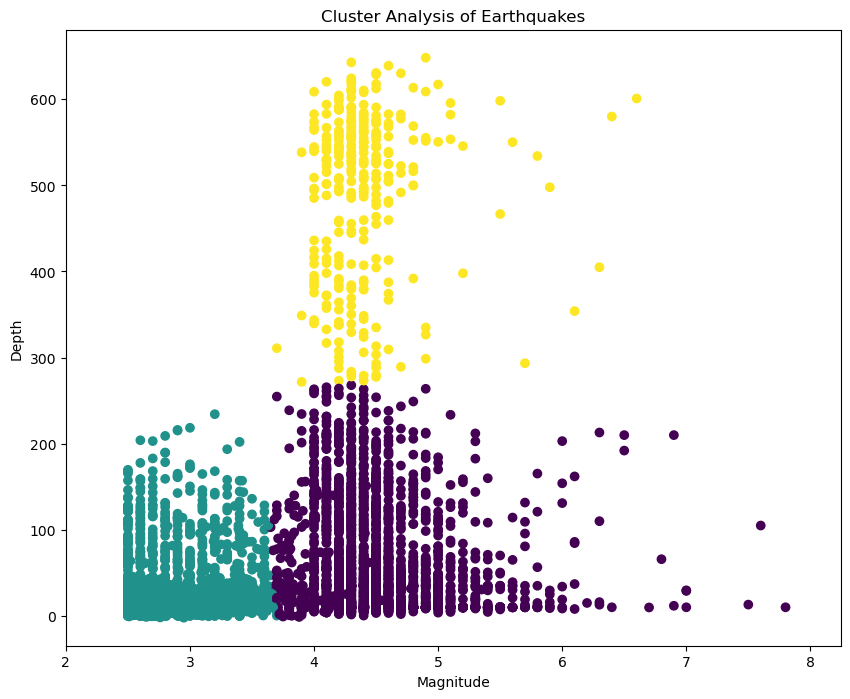

In [83]:
data = np.column_stack((dataset['mag'], dataset['depth']))
normalized_data = (data - data.mean(axis=0)) / data.std(axis=0)

k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(normalized_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.title('Cluster Analysis of Earthquakes')
plt.xlim(2)
plt.show()

Коефіцієнт кореляції: 0.1934821246719305


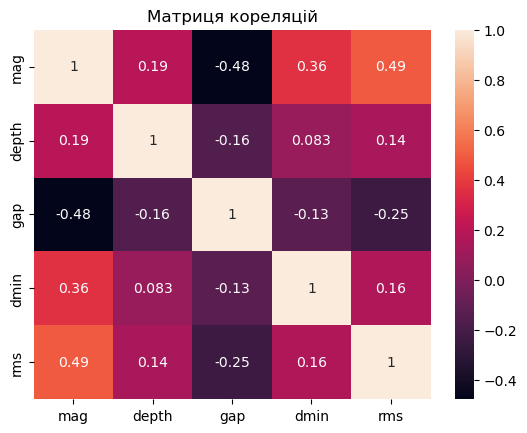

In [84]:

correlation = dataset['mag'].corr(dataset['depth'])
print(f"Коефіцієнт кореляції магнітуди та глибини: {correlation}")

correlation_matrix = dataset[['mag', 'depth', 'gap', 'dmin', 'rms']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Матриця кореляцій')
plt.show()

In [85]:
top5_country = dataset.value_counts(dataset['Country']).head(5)
top5_country = top5_country.to_frame().reset_index()
top5_country = top5_country.rename(columns= {0: 'Number'})
print(top5_country.head())


         Country  Number
0  United States    1755
1      Indonesia     560
2        Türkiye     477
3        Vanuatu     115
4          Chile     105


In [86]:
col_list = list(top5_country["Country"])
print(col_list)

['United States', 'Indonesia', 'Türkiye', 'Vanuatu', 'Chile']


In [87]:
mask = dataset['Country'].isin(col_list)
dataset = dataset.drop(index=dataset[~mask].index)

In [88]:
dataset.head()

Unnamed: 0                 time   latitude  longitude       depth   mag  \
0           0  04/06/2023 14:20:29  63.047500 -150.44320  100.200000  3.60   
1           1  04/06/2023 13:28:34  -5.736200  104.07220   84.646000  4.60   
2           2  04/06/2023 10:29:38  32.844543 -100.54366    0.953735  2.90   
3           4  04/06/2023 09:33:02  39.067600  -97.58780    5.000000  3.20   
4           5  04/06/2023 09:16:56  35.791500  -96.97850    7.230000  3.24   

  magType   nst    gap      dmin  ...                             place  \
0      ml   NaN    NaN       NaN  ...                    Central Alaska   
1      mb  31.0  183.0  1.762000  ...  134 km SW of Kotabumi, Indonesia   
2      ml  30.0   89.0  0.054159  ...            7 km W of Rotan, Texas   
3   mb_lg  31.0   66.0  0.762000  ...      4 km N of Bennington, Kansas   
4      ml  81.0   31.0  0.000000  ...                          Oklahoma   

         type horizontalError depthError magError magNst    status  \
0  earthquake             NaN    0.30000      NaN    NaN  reviewed   
1  earthquake        11.52000    9.61800    0.105   27.0  reviewed   
2  earthquake         0.88901    1.06477    0.100   15.0  reviewed   
3  earthquake         2.10000    1.98100    0.043  141.0  reviewed   
4  earthquake             NaN    0.30000    0.200   37.0  reviewed   

   locationSource  magSource        Country  
0              ak         ak  United States  
1              us         us      Indonesia  
2              tx         tx  United States  
3              us         us  United States  
4              ok         ok  United States  

[5 rows x 24 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

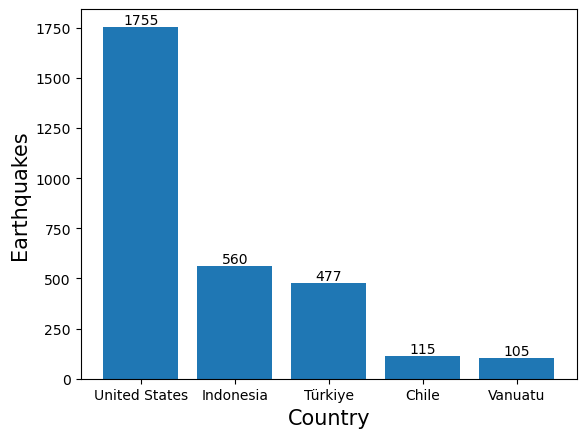

In [89]:
font_title = {'family':'Sans','color':'blue','size':25}
font_label = {'family':'Sans','color':'black','size':15}

x = dataset['Country'].unique()
y = dataset.value_counts(dataset['Country'])

ax=plt.bar(x, y)


plt.ylabel("Earthquakes", fontdict=font_label)
plt.xlabel("Country", fontdict=font_label)
plt.bar_label(ax, labels=y)

plt.show

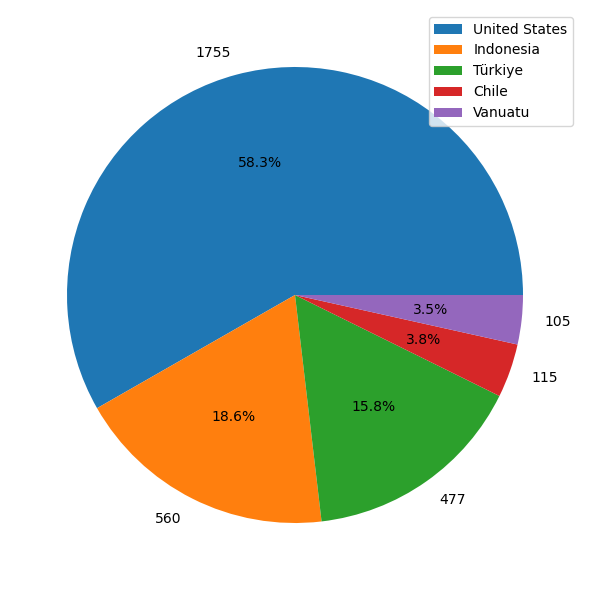

In [90]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(dataset.value_counts(dataset['Country']), labels = dataset.value_counts(dataset['Country']), autopct='%.1f%%')
ax.legend(dataset['Country'].unique())
ax.set_title('')
plt.tight_layout()

In [93]:
Chile = dataset.loc[dataset['Country'] == 'Chile']

Tur = dataset.loc[dataset['Country'] == 'Türkiye']

Vanuatu = dataset.loc[dataset['Country'] == 'Vanuatu']

Indonesia = dataset.loc[dataset['Country'] == 'Indonesia']

US = dataset.loc[dataset['Country'] == 'United States']


In [94]:
X = Tur['depth']
y = Tur['mag']

# Додавання стовпця з константою
X = sm.add_constant(X)

# Побудова регресійної моделі
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3642
Date:                Wed, 24 May 2023   Prob (F-statistic):              0.546
Time:                        13:34:35   Log-Likelihood:                -274.49
No. Observations:                 477   AIC:                             553.0
Df Residuals:                     475   BIC:                             561.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4046      0.063     69.917      0.0

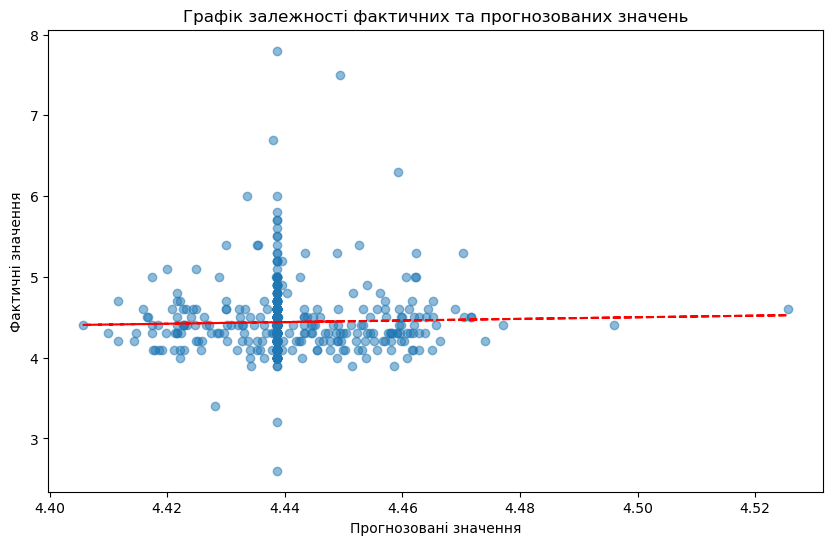

In [95]:
actual_values = Tur['mag']

# прогнозовані значення магнітуди
predicted_values = results.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, actual_values, alpha=0.5)
plt.plot(predicted_values, predicted_values, color='red', linestyle='--')
plt.xlabel('Прогнозовані значення')
plt.ylabel('Фактичні значення')
plt.title('Графік залежності фактичних та прогнозованих значень')
plt.show()



In [97]:
US = US.loc[US['mag'] >=4]
Indonesia = Indonesia.loc[Indonesia['mag'] >=4]
Vanuatu = Vanuatu.loc[Vanuatu['mag'] >=4]
Tur = Tur.loc[Tur['mag'] >=4]
Chile = Chile.loc[Chile['mag'] >=4]

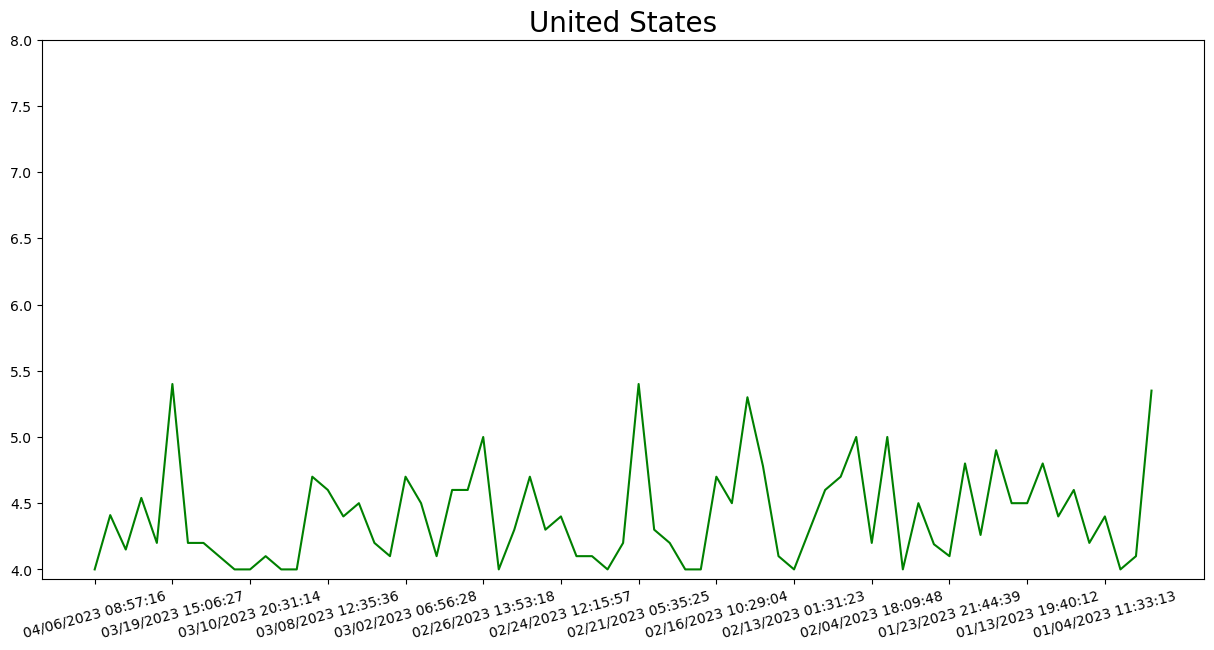

In [130]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(US['time'], US['mag'], color = 'green', label="US")

plt.xticks(rotation=15)  

interval =5 
x_ticks = range(0, len(US['time']), interval)  
x_labels = US['time'].iloc[x_ticks]  
plt.xticks(x_ticks, x_labels)  
plt.ylim(top=8)
plt.title('United States', fontsize = 20)
plt.show()

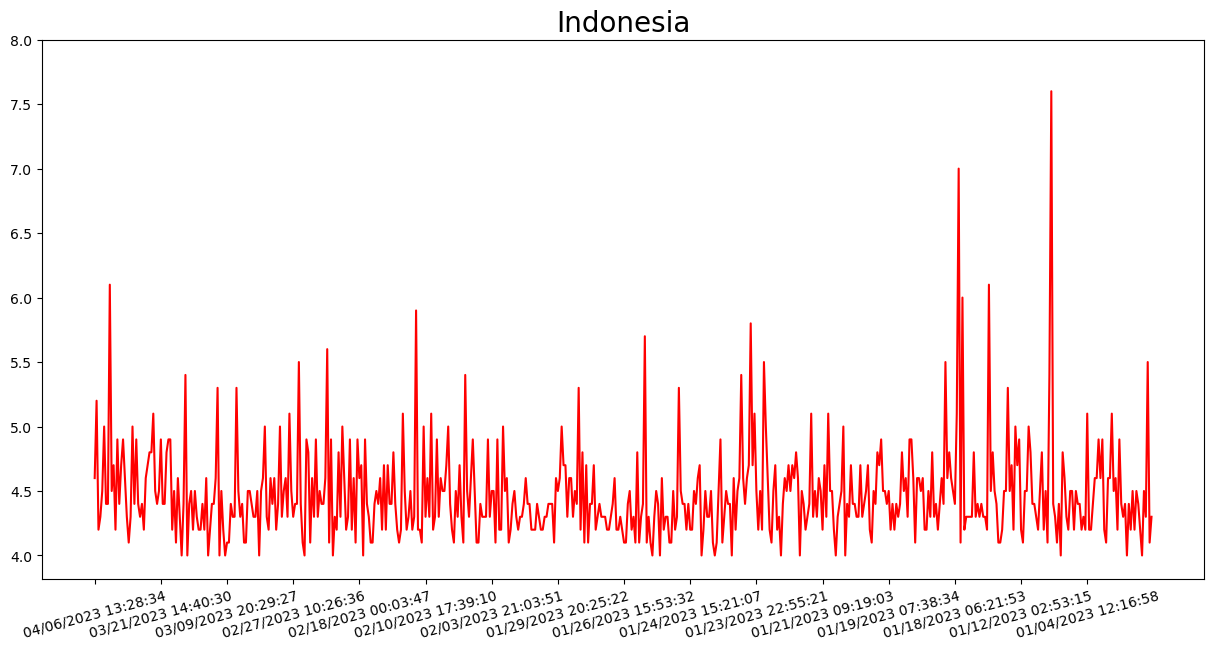

In [131]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(Indonesia['time'], Indonesia['mag'], color = 'red', label="Chile")
plt.xticks(rotation=15)  

interval =35  
x_ticks = range(0, len(Indonesia['time']), interval)  
x_labels = Indonesia['time'].iloc[x_ticks]  
plt.xticks(x_ticks, x_labels)  
plt.ylim(top=8)
plt.title('Indonesia', fontsize = 20)
plt.show()


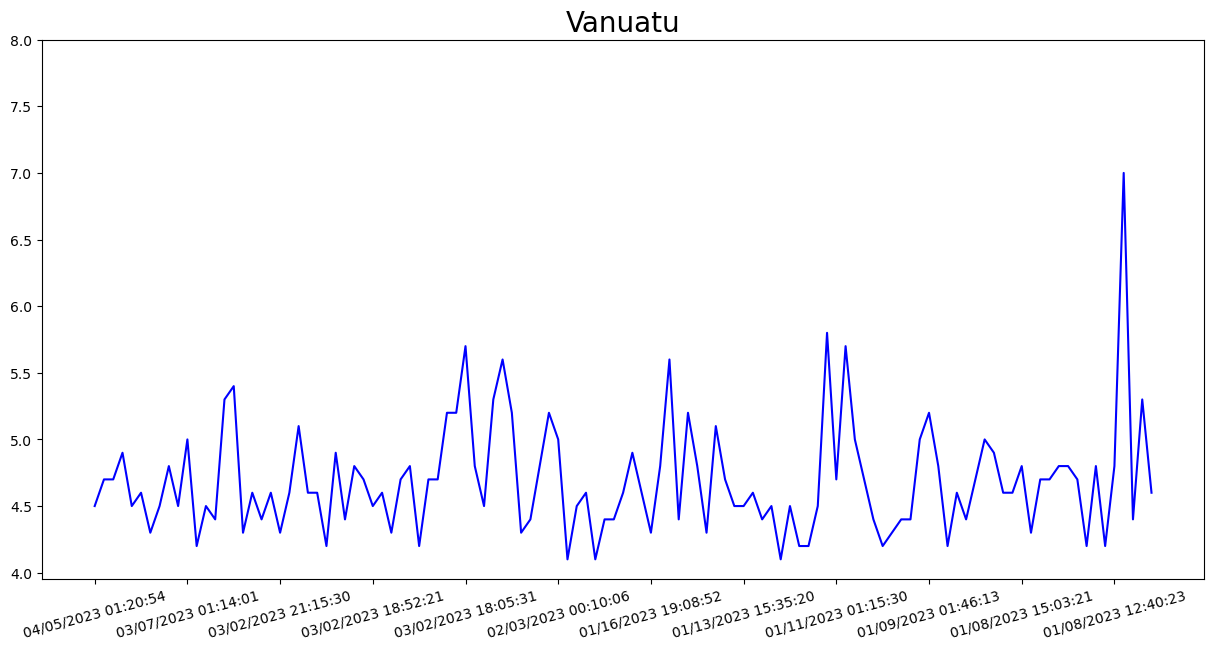

In [132]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(Vanuatu['time'], Vanuatu['mag'], color = 'blue', label="US")

plt.xticks(rotation=15)  

interval =10 
x_ticks = range(0, len(Vanuatu['time']), interval)  
x_labels = Vanuatu['time'].iloc[x_ticks]  
plt.xticks(x_ticks, x_labels)  
plt.ylim(top=8)
plt.title('Vanuatu', fontsize = 20)
plt.show()

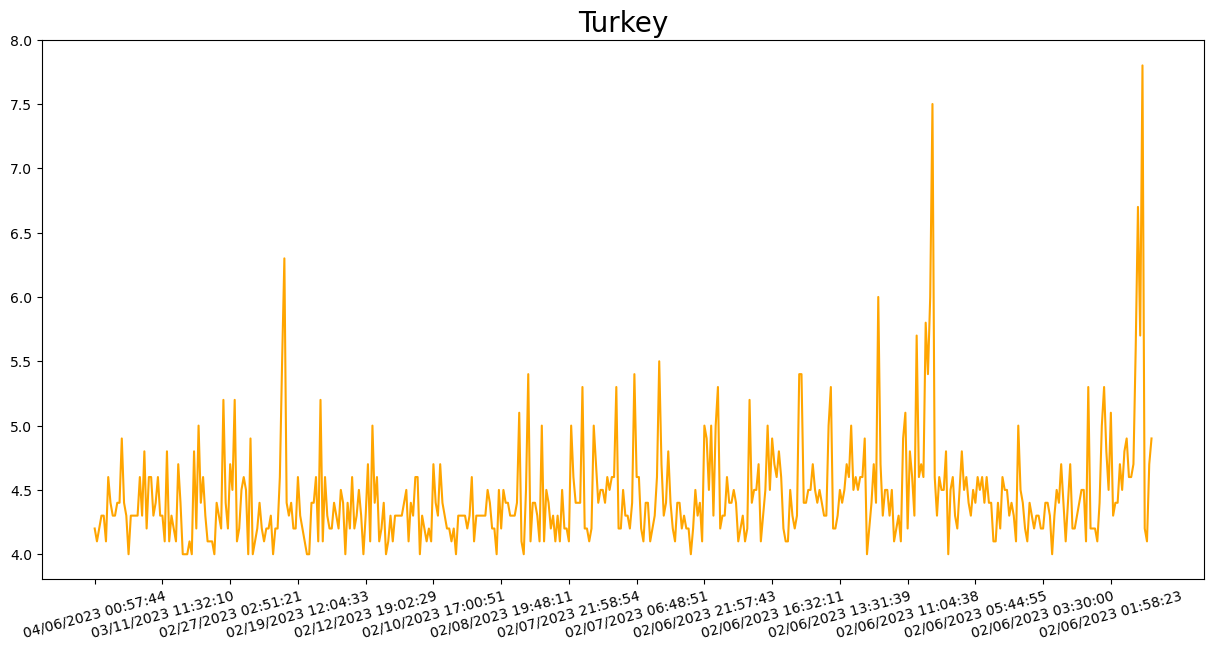

In [133]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(Tur['time'], Tur['mag'], color = 'orange', label="US")

plt.xticks(rotation=15)  

interval =30  
x_ticks = range(0, len(Tur['time']), interval)  
x_labels = Tur['time'].iloc[x_ticks]  
plt.xticks(x_ticks, x_labels)  
plt.ylim(top=8)
plt.title('Turkey', fontsize = 20)
plt.show()

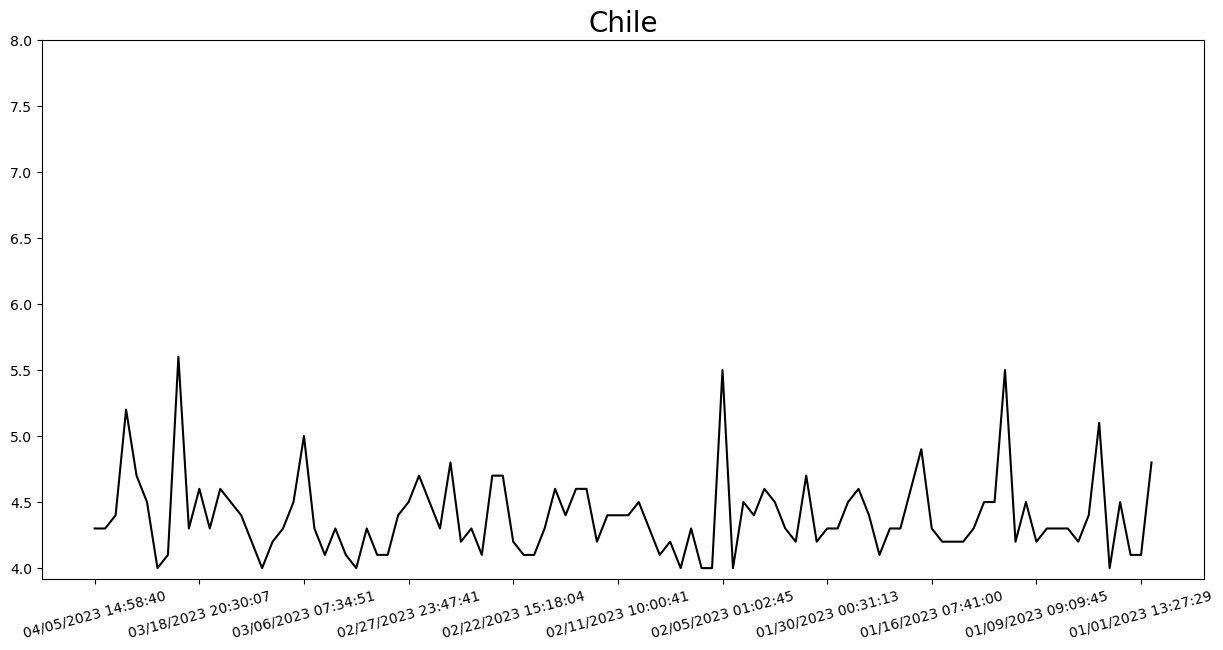

In [134]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(Chile['time'], Chile['mag'], color = 'black', label="US")

plt.xticks(rotation=15)  

interval =10  
x_ticks = range(0, len(Chile['time']), interval)  
x_labels = Chile['time'].iloc[x_ticks]  
plt.xticks(x_ticks, x_labels)  
plt.ylim(top=8)
plt.title('Chile', fontsize = 20)
plt.show()

In [117]:
meanUS = round(US['nst'].mean())
meanTur = round(Tur['nst'].mean())
meanChile = round(Chile['nst'].mean())
meanVanuatu = round(Vanuatu['nst'].mean())
meanIndonesia = round(Indonesia['nst'].mean())

print('US:', meanUS, '\n' 'Tur:', meanTur,'\n' 'Chile:', meanChile,'\n' 'Vanuatu:', meanVanuatu,'\n' 'Indonesia:', meanIndonesia)

US: 61 
Tur: 60 
Chile: 43 
Vanuatu: 43 
Indonesia: 42


In [118]:
tectonic_plates_map = pd.read_csv('C:/Users/Mark/Downloads/all.csv')
tectonic_plates_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12321 entries, 0 to 12320
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   plate   12321 non-null  object 
 1   lat     12321 non-null  float64
 2   lon     12321 non-null  float64
dtypes: float64(2), object(1)
memory usage: 288.9+ KB


In [119]:
fig_tectonic_plates_map = px.scatter_mapbox(tectonic_plates_map,
                       lon = tectonic_plates_map['lon'],
                       lat = tectonic_plates_map['lat'],
                       zoom = 2,
                       color = tectonic_plates_map['plate'],
                       width = 950,
                       height = 600,
                       title = 'tectonic plates map')


fig_tectonic_plates_map.update_layout(mapbox_style = "stamen-terrain")
fig_tectonic_plates_map.update_layout(margin = {"r":0, "t":50, "l":0, "b":10})
fig_tectonic_plates_map.show()

In [120]:

combine = dataset.loc[:, ['type','latitude','longitude']]
combine

combine.rename(columns = {'type':'plate', 'latitude':'lat',
                              'longitude':'lon'}, inplace = True)

combine=combine.assign(plate='earthquake')


In [121]:
frames = [combine, tectonic_plates_map]
  
result = pd.concat(frames)

In [122]:
result

plate        lat        lon
0      earthquake  63.047500 -150.44320
1      earthquake  -5.736200  104.07220
2      earthquake  32.844543 -100.54366
3      earthquake  39.067600  -97.58780
4      earthquake  35.791500  -96.97850
...           ...        ...        ...
12316          yz  19.713000  113.27400
12317          yz  19.288000  113.51700
12318          yz  18.863000  113.75900
12319          yz  18.438000  114.00000
12320          yz  18.438000  114.00000

[15333 rows x 3 columns]

In [123]:
fig_tectonic_plates_map = px.scatter_mapbox(result,
                       lon = result['lon'],
                       lat = result['lat'],
                       zoom = 2,
                       color = result['plate'],
                       width = 950,
                       height = 600,
                       title = 'magnitude less 5')


fig_tectonic_plates_map.update_layout(mapbox_style = "stamen-terrain")
fig_tectonic_plates_map.update_layout(margin = {"r":0, "t":50, "l":0, "b":10})
fig_tectonic_plates_map.show()

In [124]:
tect=tectonic_plates_map.assign(plate='plate')

frames2tp = [combine, tect]
  
tp_map = pd.concat(frames2tp)

In [135]:
fig_tectonic_plates_map = px.scatter_mapbox(tp_map,
                       lon = tp_map['lon'],
                       lat = tp_map['lat'],
                       zoom = 2,
                       color = tp_map['plate'],
                       width = 950,
                       height = 600,
                       title = '')


fig_tectonic_plates_map.update_layout(mapbox_style = "stamen-terrain")
fig_tectonic_plates_map.update_layout(margin = {"r":0, "t":50, "l":0, "b":10})
fig_tectonic_plates_map.show()